In [1]:
from qiskit.tools.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rand
import networkx as nx
from random_graph import random_graph
from itertools import product
from ast import literal_eval
import qutip as qt
import os

In [2]:
def get_probs(filename):
   with open(filename) as file:
       amplitudes = file.read()
   result = [[literal_eval(amplitude)] for amplitude in amplitudes[1:].split('\n ')]
   n_qubits = int(np.log2(len(result)))
   q_state = qt.Qobj(result, dims=[[2]*n_qubits, [1]*n_qubits])
   prob_vector = np.abs(q_state.full())**2
   n_qubits = len(q_state.dims[0])
   strings = product('01', repeat=n_qubits)
   return {''.join(string): prob[0] for string, prob in zip(strings, prob_vector)}

def draw_best_coloring_2colors(probs, edges):
    labels = list(probs.keys())
    probabilities = list(probs.values())
    best_prob = np.max(probabilities)
    best_coloring = labels[np.argmax(probabilities)].replace('0', 'r').replace('1', 'b')
    print('Probability of coloring: ' + str(np.round(best_prob, 4)))
    nx.draw(nx.Graph(edges), node_color=best_coloring, with_labels=False)
    
def draw_best_coloring_4colors(probs, edges):
    labels = list(probs.keys())
    probabilities = list(probs.values())
    best_prob = np.max(probabilities)
    best_coloring = labels[np.argmax(probabilities)]
    best_colors = [best_coloring[2*i:2*(i+1)] for i in range(int(len(best_coloring) / 2))]
    color_dict = {'00': 'r', '01': 'g', '10': 'b', '11': 'k'}
    best_colors =[color_dict[color] for color in best_colors]
    print('Probability of coloring: ' + str(np.round(best_prob, 4)))
    nx.draw(nx.Graph(edges), node_color=best_colors, with_labels=False)

In [3]:
to_graph_2colors = [file for file in os.listdir('results') if (file[-10:] == 'binary.txt') and (file.split('_')[2] == '2colors')]
to_graph_4colors = [file for file in os.listdir('results') if (file[-10:] == 'binary.txt') and (file.split('_')[2] == '4colors')]
structures_2colors = [file.split('_')[1] for file in to_graph_2colors]
structures_4colors = [file.split('_')[1] for file in to_graph_4colors]
graphs = {'triang': [(0, 1), (1, 2), (2, 0)],
          'line': [(0, 1), (1, 2), (2, 3)],
          'square1diag': [(0, 1), (1, 2), (2, 3), (3, 0), (0, 2)]}

Graphs with 2 colors
---

---------------3_triang_2colors_p1---------------
Probability of coloring: 0.1667


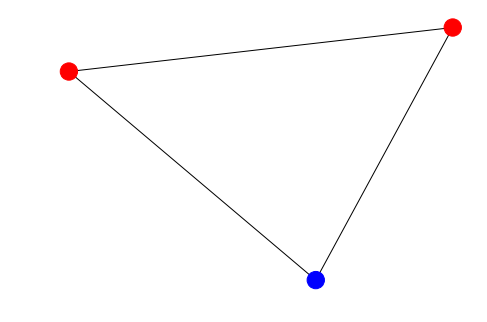

---------------4_square1diag_2colors_p4---------------
Probability of coloring: 0.4628


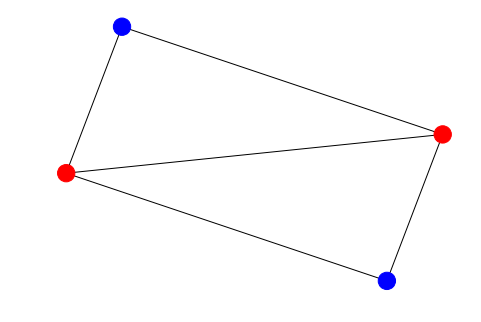

---------------4_line_2colors_p1---------------
Probability of coloring: 0.2288


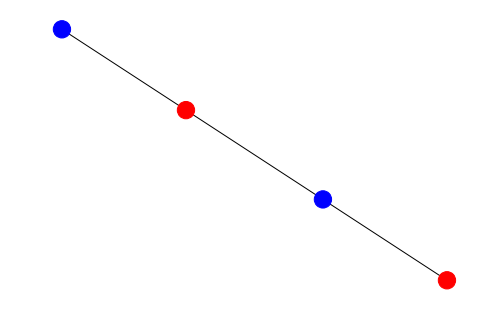

---------------4_line_2colors_p2---------------
Probability of coloring: 0.3213


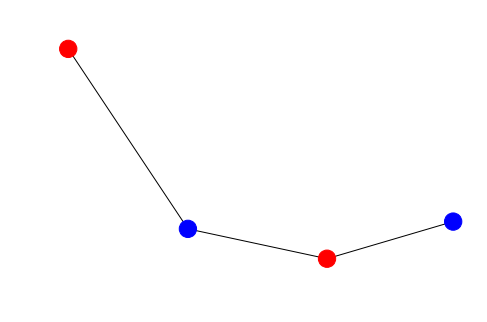

---------------4_line_2colors_p3---------------
Probability of coloring: 0.4268


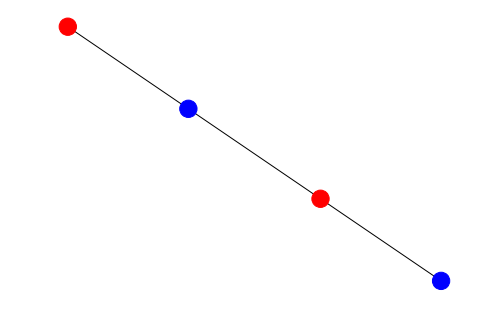

---------------3_triang_2colors_p2---------------
Probability of coloring: 0.1667


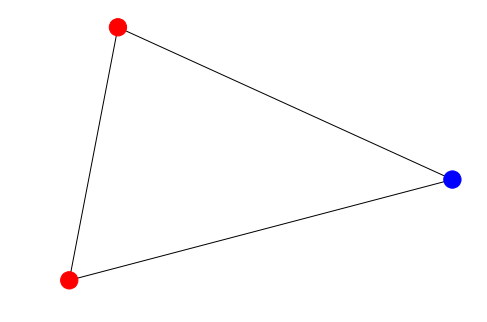

---------------4_square1diag_2colors_p3---------------
Probability of coloring: 0.4644


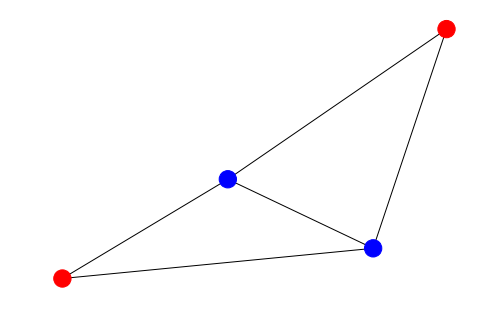

---------------3_triang_2colors_p3---------------
Probability of coloring: 0.1667


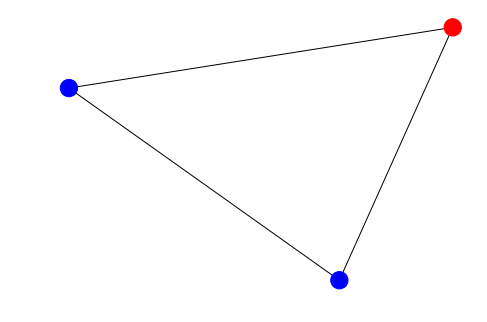

---------------4_square1diag_2colors_p2---------------
Probability of coloring: 0.4327


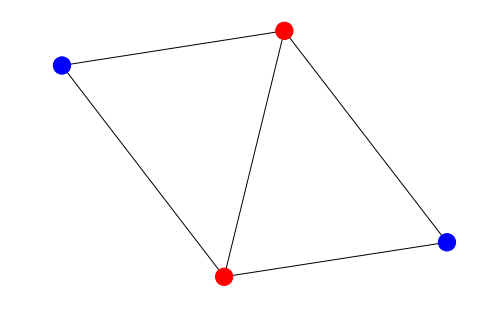

---------------4_square1diag_2colors_p1---------------
Probability of coloring: 0.2202


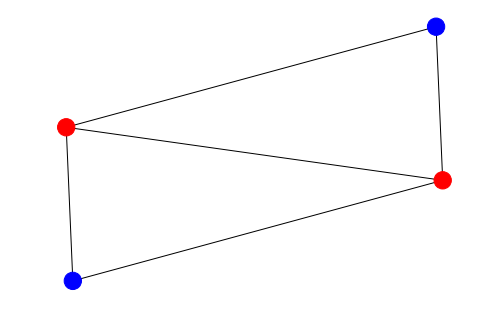

In [4]:
for graph, structure in zip(to_graph_2colors, structures_2colors):
    probs = get_probs('results/' + graph)
    print('---------------' + graph[:-11] + '---------------')
    draw_best_coloring_2colors(probs, graphs[structure])
    plt.show()

Graphs with 4 colors
---

---------------3_triang_4colors_p1---------------
Probability of coloring: 0.0278


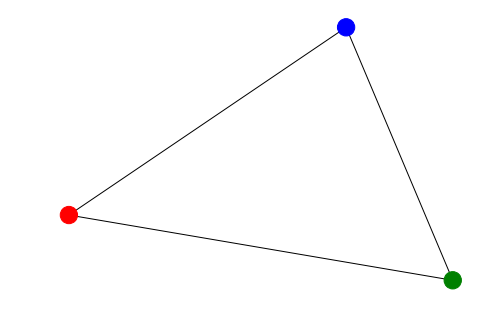

In [5]:
for graph, structure in zip(to_graph_4colors, structures_4colors):
    probs = get_probs('results/' + graph)
    print('---------------' + graph[:-11] + '---------------')
    draw_best_coloring_4colors(probs, graphs[structure])
    plt.show()